In [ ]:
#importing necessary libraries 
import pandas as pd
import numpy as np
import nltk
import gensim
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from gensim.parsing.preprocessing import STOPWORDS
import numpy as np
import pickle
nltk.download('stopwords')
nltk.download('wordnet')
import requests
import json
import urllib.request
import time
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
import re
from sklearn.metrics.pairwise import cosine_similarity
import statistics
from datetime import datetime
from scipy.stats import skew

In [ ]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing the CSV file of the dataset from google drive into a dataframe
training_dataset=pd.read_csv('drive/MyDrive/Saner/Dataset (Whole-Primary)/firefox_preproccessed_whole_dataset.csv')
training_dataset

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Resolution,Updated,Description,Duplicate_Bug_Ids
0,0,1399936,defect,Shield unenrolls users in active preference ex...,Firefox,Normandy Client,VERIFIED,FIXED,2018-01-27 11:10:40,the activity stream team is conducting a study...,NaN
1,1,1387208,defect,browser_as_load_location.js is permafailing on...,Firefox,New Tab Page,RESOLVED,FIXED,2019-06-28 14:29:46,filed by rvandermeulen at mozilla com j...,NaN
2,2,1368432,defect,web.skype.com is inaccessible: SEC_ERROR_OCSP_...,Firefox,Untriaged,RESOLVED,DUPLICATE,2017-05-29 04:49:00,user agent mozilla gecko firefox ...,1368433.0
3,3,1383741,defect,Perma failure when 56 merge to beta in browser...,Firefox,Preferences,RESOLVED,FIXED,2017-07-27 02:02:17,found via uplift simulations perma failure w...,NaN
4,4,1388753,defect,Bookmarks and history pages in Library sub men...,Firefox,Toolbars and Customization,VERIFIED,FIXED,2017-09-22 10:09:03,user agent mozilla gecko firefox ...,NaN
...,...,...,...,...,...,...,...,...,...,...,...
38285,39656,1734719,task,Fix test_bug1266815.html to work when download...,Firefox,Downloads Panel,RESOLVED,FIXED,2021-10-12 02:34:06,this test needs the external application choos...,NaN
38286,39657,1708329,enhancement,Update more of the icons in browser/themes/sha...,Firefox,Theme,VERIFIED,FIXED,2021-05-11 07:00:56,browser themes shared icons back svg go ...,NaN
38287,39658,1709129,enhancement,Downloads panel should auto open on download (...,Firefox,Downloads Panel,RESOLVED,FIXED,2022-01-15 04:53:04,created attachment download opened panel ...,NaN
38288,39659,1701347,task,Menulist chrome tests are unhappy with proton ...,Firefox,Theme,RESOLVED,FIXED,2021-03-27 13:57:58,mike kindly offered to look into this,NaN


In [ ]:
nan_value = float("NaN")
training_dataset.replace("", nan_value, inplace=True)
training_dataset.dropna(subset = ["Description"], inplace=True)

In [ ]:
cond = (training_dataset['Description'] == 'NaN')
cond.unique()

array([False])

In [ ]:
duplicate_test = training_dataset[training_dataset['Duplicate_Bug_Ids'] > 0]
duplicate_test

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Resolution,Updated,Description,Duplicate_Bug_Ids
2,2,1368432,defect,web.skype.com is inaccessible: SEC_ERROR_OCSP_...,Firefox,Untriaged,RESOLVED,DUPLICATE,2017-05-29 04:49:00,user agent mozilla gecko firefox ...,1368433.0
12,12,1337204,defect,Mozilla Firefox 51.0.1 uses a lot of memory wi...,Firefox,Extension Compatibility,RESOLVED,DUPLICATE,2017-07-05 11:48:47,user agent mozilla gecko firefox ...,1346556.0
14,14,1396728,defect,Windows 7 professional 64bit running Fx 51.0.1...,Firefox,Migration,RESOLVED,DUPLICATE,2017-09-19 16:35:17,user agent mozilla gecko firefox ...,1352458.0
17,17,1368321,defect,"Firefox version 53.0.3 appears high memory, hi...",Firefox,Untriaged,RESOLVED,DUPLICATE,2017-07-05 11:45:21,user agent mozilla gecko firefox ...,1346556.0
20,20,1340122,defect,List box (or) Drop-down box background color n...,Firefox,Untriaged,RESOLVED,DUPLICATE,2017-02-16 04:31:51,user agent mozilla gecko firefox ...,910022.0
...,...,...,...,...,...,...,...,...,...,...,...
38251,39621,1724390,defect,Option to add the already added click search e...,Firefox,Search,RESOLVED,DUPLICATE,2021-08-06 04:40:51,created attachment searchengine png affec...,1457069.0
38252,39622,1713309,defect,Add search engine: Yandex icon design changes ...,Firefox,Search,RESOLVED,DUPLICATE,2021-06-07 00:35:39,created attachment jpg affected ubunt...,1457069.0
38253,39623,1747252,defect,[macOS] Tab border is black with certain custo...,Firefox,Theme,RESOLVED,DUPLICATE,2022-01-25 12:01:42,created attachment before after tab affect...,1746000.0
38254,39624,1717820,defect,[XFA] A string is displayed as double-underlin...,Firefox,PDF Viewer,RESOLVED,DUPLICATE,2021-07-08 05:45:39,created attachment pdf note ...,1716833.0


In [ ]:
ted = duplicate_test['Description']

## Using TF-IDF with cosine similarity

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
import re

tfidf_vectorizer = TfidfVectorizer()
stemmer = PorterStemmer()

def tokenizer(arg):
    tokens = re.split(r'(\W+)', arg.lower())
    tokens = [
        token for token in tokens
        if re.match('\\w+', token) and not re.match('\\d+', token)
    ]
    
    return list(map(stemmer.stem, tokens))
tfidf_vectorizer.tokenizer = tokenizer
tfidf_vectorizer.fit(duplicate_test.Description)
tfidf_matrix_desc = tfidf_vectorizer.transform(duplicate_test.Description)

len(tfidf_vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


14864

In [ ]:
tfidf_matrix_desc.shape

(7859, 14864)

In [ ]:
ted = duplicate_test['Description']
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Generate matrix of word vectors
tfidf_matrix = vectorizer.fit_transform(ted)

# Print the shape of tfidf_matrix
print(tfidf_matrix.shape)

(7859, 19068)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Initialize an instance of tf-idf Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Generate the tf-idf vectors for the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(ted)

# compute and print the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim)

[[1.         0.04122147 0.04019784 ... 0.02639855 0.042071   0.01534793]
 [0.04122147 1.         0.07110638 ... 0.06228067 0.03302893 0.01394963]
 [0.04019784 0.07110638 1.         ... 0.05066284 0.0219455  0.02641063]
 ...
 [0.02639855 0.06228067 0.05066284 ... 1.         0.11492979 0.00451332]
 [0.042071   0.03302893 0.0219455  ... 0.11492979 1.         0.00434397]
 [0.01534793 0.01394963 0.02641063 ... 0.00451332 0.00434397 1.        ]]


In [ ]:
print(len(cosine_sim))
print(cosine_sim.shape)

7859
(7859, 7859)


In [ ]:
avg =np.average(cosine_sim, axis=1)
cosine_sim[1]

array([0.04122147, 1.        , 0.07110638, ..., 0.06228067, 0.03302893,
       0.01394963])

In [ ]:
avg_df = pd.DataFrame(avg, columns = ['Avg_Sim_Score'])
print(avg_df)
print(len(avg_df))

      Avg_Sim_Score
0          0.052124
1          0.064657
2          0.054866
3          0.059955
4          0.066806
...             ...
7854       0.077664
7855       0.062679
7856       0.057429
7857       0.051705
7858       0.045372

[7859 rows x 1 columns]
7859


In [ ]:
avg_for_sorting = pd.DataFrame(avg_df)

In [ ]:
sorted= avg_for_sorting.sort_values(by='Avg_Sim_Score', ascending=False)
sorted

,Avg_Sim_Score
3624,0.126820
2782,0.125641
590,0.122554
4331,0.120099
4641,0.119707
...,...
3980,0.001351
1832,0.001196
3929,0.000202
7230,0.000194


In [ ]:
import statistics
from scipy.stats import skew
#testing skewness of distribution
print(skew(avg))
print(skew(avg, bias=False))

-0.049826805982141224
-0.04983631844445647


In [ ]:
median = statistics.median(avg)
print(statistics.median(avg))

0.060176621036006114


In [ ]:
duplicate_test.insert(loc=7,
          column='Average_Cos_Similarity_Score',
          value=avg_df.values)

In [ ]:
score_similar_unigram = duplicate_test[duplicate_test['Average_Cos_Similarity_Score'] >= median]
score_similar_unigram

In [ ]:
score_dissimilar_unigram = duplicate_test[duplicate_test['Average_Cos_Similarity_Score'] < median]
score_dissimilar_unigram

In [ ]:
# import the required library 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
score_val = sorted['Avg_Sim_Score'].values.tolist()

       label  lower_whisker  lower_quartile    median  upper_quartile  \
0  score_val       0.004051        0.045692  0.060177        0.074049   

   upper_whisker  
0       0.115422  


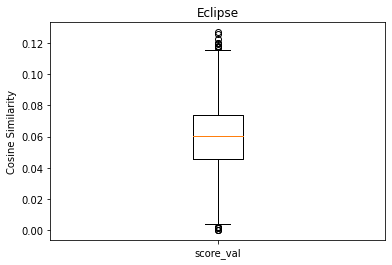

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

labels = ['score_val']
bp = plt.boxplot([score_val], labels=labels)
plt.ylabel("Cosine Similarity")
plt.title('Eclipse')
print(get_box_plot_data(labels, bp))
plt.show()

In [ ]:
#Values taken from box plot (lower and upper quartile)
less = 0.045692
more =  0.074049

In [ ]:
score_similar_unigram_final = duplicate_test[duplicate_test['Average_Cos_Similarity_Score'] >= more]
score_similar_unigram_final

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Average_Cos_Similarity_Score,Resolution,Updated,Description,Duplicate_Bug_Ids
89,95,1418073,defect,Drag & Drop for images to desktop strips file ...,Firefox,File Handling,RESOLVED,0.077509,DUPLICATE,2017-12-07 00:38:37,user agent mozilla gecko firefox ...,1389836.0
301,319,1352420,defect,"The distance between the text and the ""Learn M...",Firefox,Preferences,RESOLVED,0.074542,DUPLICATE,2017-08-18 07:36:00,created attachment png note this bug...,1377174.0
323,342,1369688,defect,One-off search takes the initial value rather ...,Firefox,Address Bar,RESOLVED,0.086483,DUPLICATE,2017-06-03 05:50:32,created attachment keyselectedsearch mozi...,1331736.0
631,671,1332106,enhancement,[Deleted][Windows 10] Possible Cortana Search ...,Firefox,Search,RESOLVED,0.083782,DUPLICATE,2017-01-18 15:17:32,user agent mozilla gecko firefox ...,1332118.0
1254,1326,1384068,defect,Wrong Change search settings redirection from ...,Firefox,Preferences,RESOLVED,0.081689,DUPLICATE,2017-08-27 18:45:24,created attachment about preferences general...,1384402.0
...,...,...,...,...,...,...,...,...,...,...,...,...
38218,39588,1690250,enhancement,Close menu when clicking near dropdowns with ˆ...,Firefox,Menus,RESOLVED,0.079226,DUPLICATE,2021-02-08 07:29:01,created attachment screen recording at...,1507681.0
38239,39609,1723008,defect,When opening a file off disk in the PDF Viewer...,Firefox,PDF Viewer,RESOLVED,0.084095,DUPLICATE,2021-08-12 00:12:55,created attachment a blank pdf just for tes...,1723924.0
38240,39610,1732606,enhancement,Send tab button disappeared from URL bar,Firefox,Tabbed Browser,RESOLVED,0.075116,DUPLICATE,2021-11-08 12:04:32,user agent mozilla gecko firefox ...,1706232.0
38243,39613,1733546,defect,[win] No focus is displayed when using keyboar...,Firefox,Downloads Panel,RESOLVED,0.079259,DUPLICATE,2021-10-13 09:06:43,created attachment gif affected versions...,1686694.0


In [ ]:
score_dissimilar_unigram_final = duplicate_test[duplicate_test['Average_Cos_Similarity_Score'] <= less]
score_dissimilar_unigram_final

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Average_Cos_Similarity_Score,Resolution,Updated,Description,Duplicate_Bug_Ids
51,52,1357039,enhancement,Should add the Customize Firefox tour in the o...,Firefox,General,RESOLVED,0.040166,DUPLICATE,2017-06-14 22:34:09,should add the customize firefox tour in the o...,1357029.0
72,76,1359062,defect,Increase contrast of the Downloads Indicator o...,Firefox,Downloads Panel,RESOLVED,0.043839,DUPLICATE,2017-06-04 23:44:56,nightly on windows at the moment a...,1347543.0
96,102,1357056,defect,Should not display the notification bar if use...,Firefox,General,RESOLVED,0.036657,DUPLICATE,2017-06-18 20:01:01,should not display the notification for the co...,1357641.0
231,245,1378164,defect,"Noisy debug in a debug build (of Thunderbird, ...",Firefox,Theme,RESOLVED,0.042511,DUPLICATE,2017-07-04 08:33:46,this bug was initially created as a clone ...,1377923.0
294,312,1386531,enhancement,Add smile/sad face image for the default brows...,Firefox,Preferences,RESOLVED,0.023955,DUPLICATE,2017-08-09 09:16:16,add smile sad face image for the default brows...,1361957.0
...,...,...,...,...,...,...,...,...,...,...,...,...
38236,39606,1732703,defect,Intermittent browser/components/preferences/te...,Firefox,Preferences,RESOLVED,0.037321,DUPLICATE,2021-12-14 07:19:14,filed by ctuns at mozilla com parsed ...,1731059.0
38238,39608,1734251,defect,Intermittent browser/base/content/test/general...,Firefox,General,RESOLVED,0.034630,DUPLICATE,2021-12-05 22:37:57,filed by imoraru at mozilla com parse...,1733524.0
38245,39615,1734045,defect,Intermittent browser/base/content/test/general...,Firefox,General,RESOLVED,0.039955,DUPLICATE,2021-10-11 02:40:19,filed by ctuns at mozilla com parsed ...,1733524.0
38249,39619,1742873,defect,Intermittent browser_connection_dnsoverhttps.j...,Firefox,Preferences,RESOLVED,0.042617,DUPLICATE,2021-11-28 22:29:01,filed by imoraru at mozilla com parse...,1741554.0


## Using N gram to divide

## Unigram

In [ ]:
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1,1), lowercase=True, min_df=2)
X = vectorizer.fit_transform(ted)

In [ ]:
X.shape

(7859, 9072)

In [ ]:
cosine_sim = cosine_similarity(X, X)
print(cosine_sim)

[[1.         0.04245795 0.04045055 ... 0.02721041 0.042071   0.0154029 ]
 [0.04245795 1.         0.07369971 ... 0.06612169 0.03401967 0.01441953]
 [0.04045055 0.07369971 1.         ... 0.05254922 0.02208346 0.02667185]
 ...
 [0.02721041 0.06612169 0.05254922 ... 1.         0.11846437 0.00466879]
 [0.042071   0.03401967 0.02208346 ... 0.11846437 1.         0.00435953]
 [0.0154029  0.01441953 0.02667185 ... 0.00466879 0.00435953 1.        ]]


In [ ]:
avg =np.average(cosine_sim, axis=1)
avg_df = pd.DataFrame(avg, columns = ['Avg_Sim_Score'])
avg_for_sorting = pd.DataFrame(avg_df)
sorted= avg_for_sorting.sort_values(by='Avg_Sim_Score', ascending=False)
median = statistics.median(avg)
print(statistics.median(avg))

0.06332519385251839


In [ ]:
score_val = sorted['Avg_Sim_Score'].values.tolist()

       label  lower_whisker  lower_quartile    median  upper_quartile  \
0  score_val       0.004821        0.048253  0.063325         0.07755   

   upper_whisker  
0       0.121395  


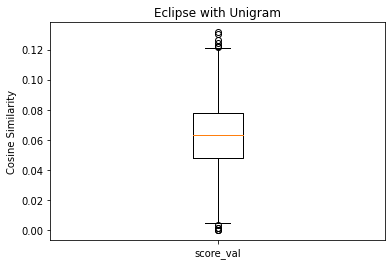

In [ ]:
def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

labels = ['score_val']
bp = plt.boxplot([score_val], labels=labels)
plt.ylabel("Cosine Similarity")
plt.title('Eclipse with Unigram')
print(get_box_plot_data(labels, bp))
plt.show()

In [ ]:
#Values taken from box plot (lower and upper quartile)
less =  0.048253
more = 0.07755

In [ ]:
score_similar_unigram1_final = duplicate_test[duplicate_test['Average_Cos_Similarity_Score'] >= more]
score_similar_unigram1_final

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Average_Cos_Similarity_Score,Resolution,Updated,Description,Duplicate_Bug_Ids
89,95,1418073,defect,Drag & Drop for images to desktop strips file ...,Firefox,File Handling,RESOLVED,0.077509,DUPLICATE,2017-12-07 00:38:37,user agent mozilla gecko firefox ...,1389836.0
301,319,1352420,defect,"The distance between the text and the ""Learn M...",Firefox,Preferences,RESOLVED,0.074542,DUPLICATE,2017-08-18 07:36:00,created attachment png note this bug...,1377174.0
323,342,1369688,defect,One-off search takes the initial value rather ...,Firefox,Address Bar,RESOLVED,0.086483,DUPLICATE,2017-06-03 05:50:32,created attachment keyselectedsearch mozi...,1331736.0
631,671,1332106,enhancement,[Deleted][Windows 10] Possible Cortana Search ...,Firefox,Search,RESOLVED,0.083782,DUPLICATE,2017-01-18 15:17:32,user agent mozilla gecko firefox ...,1332118.0
1254,1326,1384068,defect,Wrong Change search settings redirection from ...,Firefox,Preferences,RESOLVED,0.081689,DUPLICATE,2017-08-27 18:45:24,created attachment about preferences general...,1384402.0
...,...,...,...,...,...,...,...,...,...,...,...,...
38218,39588,1690250,enhancement,Close menu when clicking near dropdowns with ˆ...,Firefox,Menus,RESOLVED,0.079226,DUPLICATE,2021-02-08 07:29:01,created attachment screen recording at...,1507681.0
38239,39609,1723008,defect,When opening a file off disk in the PDF Viewer...,Firefox,PDF Viewer,RESOLVED,0.084095,DUPLICATE,2021-08-12 00:12:55,created attachment a blank pdf just for tes...,1723924.0
38240,39610,1732606,enhancement,Send tab button disappeared from URL bar,Firefox,Tabbed Browser,RESOLVED,0.075116,DUPLICATE,2021-11-08 12:04:32,user agent mozilla gecko firefox ...,1706232.0
38243,39613,1733546,defect,[win] No focus is displayed when using keyboar...,Firefox,Downloads Panel,RESOLVED,0.079259,DUPLICATE,2021-10-13 09:06:43,created attachment gif affected versions...,1686694.0


In [ ]:
score_dissimilar_unigram1_final = duplicate_test[duplicate_test['Average_Cos_Similarity_Score'] <= less]
score_dissimilar_unigram1_final

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Average_Cos_Similarity_Score,Resolution,Updated,Description,Duplicate_Bug_Ids
51,52,1357039,enhancement,Should add the Customize Firefox tour in the o...,Firefox,General,RESOLVED,0.040166,DUPLICATE,2017-06-14 22:34:09,should add the customize firefox tour in the o...,1357029.0
72,76,1359062,defect,Increase contrast of the Downloads Indicator o...,Firefox,Downloads Panel,RESOLVED,0.043839,DUPLICATE,2017-06-04 23:44:56,nightly on windows at the moment a...,1347543.0
96,102,1357056,defect,Should not display the notification bar if use...,Firefox,General,RESOLVED,0.036657,DUPLICATE,2017-06-18 20:01:01,should not display the notification for the co...,1357641.0
231,245,1378164,defect,"Noisy debug in a debug build (of Thunderbird, ...",Firefox,Theme,RESOLVED,0.042511,DUPLICATE,2017-07-04 08:33:46,this bug was initially created as a clone ...,1377923.0
294,312,1386531,enhancement,Add smile/sad face image for the default brows...,Firefox,Preferences,RESOLVED,0.023955,DUPLICATE,2017-08-09 09:16:16,add smile sad face image for the default brows...,1361957.0
...,...,...,...,...,...,...,...,...,...,...,...,...
38236,39606,1732703,defect,Intermittent browser/components/preferences/te...,Firefox,Preferences,RESOLVED,0.037321,DUPLICATE,2021-12-14 07:19:14,filed by ctuns at mozilla com parsed ...,1731059.0
38238,39608,1734251,defect,Intermittent browser/base/content/test/general...,Firefox,General,RESOLVED,0.034630,DUPLICATE,2021-12-05 22:37:57,filed by imoraru at mozilla com parse...,1733524.0
38245,39615,1734045,defect,Intermittent browser/base/content/test/general...,Firefox,General,RESOLVED,0.039955,DUPLICATE,2021-10-11 02:40:19,filed by ctuns at mozilla com parsed ...,1733524.0
38249,39619,1742873,defect,Intermittent browser_connection_dnsoverhttps.j...,Firefox,Preferences,RESOLVED,0.042617,DUPLICATE,2021-11-28 22:29:01,filed by imoraru at mozilla com parse...,1741554.0


In [ ]:
#Download to csv
score_similar_unigram1_final.to_csv("Firefox_textually_similar_unigram1_final.csv",index=False)
score_dissimilar_unigram1_final.to_csv("Firefox_textually_dissimilar_unigram1_final.csv",index=False)

## Bigram

In [ ]:
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1,2), lowercase=True, min_df=2)
X = vectorizer.fit_transform(ted)

In [ ]:
X.shape

(7859, 67596)

In [ ]:
cosine_sim = cosine_similarity(X, X)
print(cosine_sim)

[[1.         0.02521412 0.02161435 ... 0.01077285 0.01909951 0.00715465]
 [0.02521412 1.         0.03488997 ... 0.02475384 0.01550532 0.00676029]
 [0.02161435 0.03488997 1.         ... 0.02144234 0.01105035 0.0163111 ]
 ...
 [0.01077285 0.02475384 0.02144234 ... 1.         0.07914972 0.00203209]
 [0.01909951 0.01550532 0.01105035 ... 0.07914972 1.         0.00229606]
 [0.00715465 0.00676029 0.0163111  ... 0.00203209 0.00229606 1.        ]]


In [ ]:
avg =np.average(cosine_sim, axis=1)
avg_df = pd.DataFrame(avg, columns = ['Avg_Sim_Score'])
avg_for_sorting = pd.DataFrame(avg_df)
sorted= avg_for_sorting.sort_values(by='Avg_Sim_Score', ascending=False)
median = statistics.median(avg)
print(statistics.median(avg))

0.0297766713772623


In [ ]:
score_val = sorted['Avg_Sim_Score'].values.tolist()

       label  lower_whisker  lower_quartile    median  upper_quartile  \
0  score_val       0.004917         0.02326  0.029777        0.035516   

   upper_whisker  
0       0.053803  


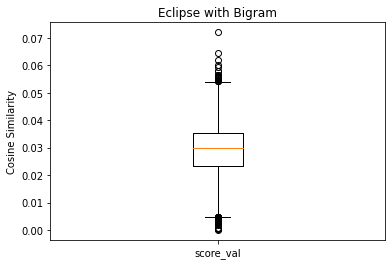

In [ ]:
def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

labels = ['score_val']
bp = plt.boxplot([score_val], labels=labels)
plt.ylabel("Cosine Similarity")
plt.title('Eclipse with Bigram')
print(get_box_plot_data(labels, bp))
plt.show()

In [ ]:
#Values taken from box plot (lower and upper quartile)
less = 0.02326
more = 0.035516

In [ ]:
duplicate_test.insert(loc=7,
          column='Average_Cos_Similarity_Bigram',
          value=avg_df.values)
score_similar_bigram = duplicate_test[duplicate_test['Average_Cos_Similarity_Bigram'] >= more]
score_similar_bigram

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Average_Cos_Similarity_Bigram,Average_Cos_Similarity_Score,Resolution,Updated,Description,Duplicate_Bug_Ids
89,95,1418073,defect,Drag & Drop for images to desktop strips file ...,Firefox,File Handling,RESOLVED,0.037285,0.077509,DUPLICATE,2017-12-07 00:38:37,user agent mozilla gecko firefox ...,1389836.0
323,342,1369688,defect,One-off search takes the initial value rather ...,Firefox,Address Bar,RESOLVED,0.039369,0.086483,DUPLICATE,2017-06-03 05:50:32,created attachment keyselectedsearch mozi...,1331736.0
631,671,1332106,enhancement,[Deleted][Windows 10] Possible Cortana Search ...,Firefox,Search,RESOLVED,0.052553,0.083782,DUPLICATE,2017-01-18 15:17:32,user agent mozilla gecko firefox ...,1332118.0
1432,1513,1328104,defect,Add Search Engine Button Does Not Work,Firefox,Search,RESOLVED,0.041078,0.082702,DUPLICATE,2017-03-31 07:05:33,user agent mozilla gecko firefox ...,1323525.0
1543,1626,1333599,defect,URL Spoofing by using onbeforeunload and openi...,Firefox,Address Bar,RESOLVED,0.051607,0.094942,DUPLICATE,2020-07-09 13:23:51,i have noticed that the onbeforeunload dialog ...,1481994.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38189,39559,1721313,defect,Middle clicking to paste/insert into the addre...,Firefox,Address Bar,VERIFIED,0.039331,0.085929,DUPLICATE,2021-09-01 16:53:27,user agent mozilla gecko firefox ...,1658059.0
38205,39575,1703199,defect,The meatball buttons in about:addons have diff...,Firefox,General,RESOLVED,0.035658,0.069954,DUPLICATE,2021-04-09 02:18:35,created attachment about addons plugins page...,1698500.0
38218,39588,1690250,enhancement,Close menu when clicking near dropdowns with ˆ...,Firefox,Menus,RESOLVED,0.036289,0.079226,DUPLICATE,2021-02-08 07:29:01,created attachment screen recording at...,1507681.0
38239,39609,1723008,defect,When opening a file off disk in the PDF Viewer...,Firefox,PDF Viewer,RESOLVED,0.040639,0.084095,DUPLICATE,2021-08-12 00:12:55,created attachment a blank pdf just for tes...,1723924.0


In [ ]:
score_dissimilar_bigram_final = duplicate_test[duplicate_test['Average_Cos_Similarity_Bigram'] <= less]
score_dissimilar_bigram_final

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Average_Cos_Similarity_Bigram,Average_Cos_Similarity_Score,Resolution,Updated,Description,Duplicate_Bug_Ids
51,52,1357039,enhancement,Should add the Customize Firefox tour in the o...,Firefox,General,RESOLVED,0.015288,0.040166,DUPLICATE,2017-06-14 22:34:09,should add the customize firefox tour in the o...,1357029.0
72,76,1359062,defect,Increase contrast of the Downloads Indicator o...,Firefox,Downloads Panel,RESOLVED,0.020157,0.043839,DUPLICATE,2017-06-04 23:44:56,nightly on windows at the moment a...,1347543.0
96,102,1357056,defect,Should not display the notification bar if use...,Firefox,General,RESOLVED,0.015773,0.036657,DUPLICATE,2017-06-18 20:01:01,should not display the notification for the co...,1357641.0
185,195,1357041,defect,Should highlight the customize button in the h...,Firefox,General,RESOLVED,0.018419,0.045987,DUPLICATE,2017-06-14 22:34:42,should highlight the customize button in the h...,1357029.0
231,245,1378164,defect,"Noisy debug in a debug build (of Thunderbird, ...",Firefox,Theme,RESOLVED,0.019335,0.042511,DUPLICATE,2017-07-04 08:33:46,this bug was initially created as a clone ...,1377923.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38138,39507,1728972,defect,download-helper label hard coded instead of re...,Firefox,Preferences,RESOLVED,0.022304,0.041954,DUPLICATE,2021-10-01 07:53:00,user agent mozilla gecko firefox ...,1707462.0
38174,39544,1723347,defect,Intermittent browser/components/preferences/te...,Firefox,Preferences,RESOLVED,0.022232,0.030835,DUPLICATE,2021-08-02 08:19:36,filed by ncsoregi at mozilla com pars...,1717917.0
38180,39550,1710900,defect,Site permissions panel is incorrectly aligned ...,Firefox,Site Permissions,RESOLVED,0.016695,0.040592,DUPLICATE,2021-05-18 04:23:41,created attachment site permissions misalign...,1709870.0
38195,39565,1696330,defect,Certviewer does not wrap PEM (chain) files,Firefox,Security,RESOLVED,0.014231,0.021568,DUPLICATE,2021-03-08 06:31:24,steps to reproduce open the certificate vi...,1615612.0


In [ ]:
#Download to csv
score_similar_bigram.to_csv("Firefox_textually_similar_bigram_final.csv",index=False)
score_dissimilar_bigram_final.to_csv("Firefox_textually_dissimilar_bigram_final.csv",index=False)

In [ ]:
## Comparison with unigram and bigram for similar
score_similar_bigram['Bug ID'].equals(score_similar_unigram1_final['Bug ID'])

False

In [ ]:
bug_list_bigram = list(score_similar_bigram["Bug ID"])
bug_list_unigram = list(score_similar_unigram1_final["Bug ID"])

In [ ]:
count_id = 0
dup_id_in_bug_id = []
for i,v in enumerate(bug_list_bigram):
    if (v in bug_list_unigram):
        count_id +=1
        dup_id_in_bug_id.append(v)

In [ ]:
len(dup_id_in_bug_id)

1589

In [ ]:
dup_id_in_bug_id

In [ ]:
#score_similar_bigram.loc[score_similar_bigram['Bug ID'] == 517113.0]

In [ ]:
#score_similar_unigram1_final.loc[score_similar_unigram1_final['Bug ID'] == 517113.0]

In [ ]:
new_sim = score_similar_bigram [score_similar_bigram['Bug ID'].isin(dup_id_in_bug_id)]

In [ ]:
new_sim

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Average_Cos_Similarity_Bigram,Average_Cos_Similarity_Score,Resolution,Updated,Description,Duplicate_Bug_Ids
89,95,1418073,defect,Drag & Drop for images to desktop strips file ...,Firefox,File Handling,RESOLVED,0.037285,0.077509,DUPLICATE,2017-12-07 00:38:37,user agent mozilla gecko firefox ...,1389836.0
323,342,1369688,defect,One-off search takes the initial value rather ...,Firefox,Address Bar,RESOLVED,0.039369,0.086483,DUPLICATE,2017-06-03 05:50:32,created attachment keyselectedsearch mozi...,1331736.0
631,671,1332106,enhancement,[Deleted][Windows 10] Possible Cortana Search ...,Firefox,Search,RESOLVED,0.052553,0.083782,DUPLICATE,2017-01-18 15:17:32,user agent mozilla gecko firefox ...,1332118.0
1432,1513,1328104,defect,Add Search Engine Button Does Not Work,Firefox,Search,RESOLVED,0.041078,0.082702,DUPLICATE,2017-03-31 07:05:33,user agent mozilla gecko firefox ...,1323525.0
1543,1626,1333599,defect,URL Spoofing by using onbeforeunload and openi...,Firefox,Address Bar,RESOLVED,0.051607,0.094942,DUPLICATE,2020-07-09 13:23:51,i have noticed that the onbeforeunload dialog ...,1481994.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38186,39556,1694347,defect,ALT key + UP/DOWN shortcut doesn't work on Ubu...,Firefox,Address Bar,RESOLVED,0.037517,0.085244,DUPLICATE,2021-02-25 00:29:32,affected versions firefox firefox ...,1488708.0
38189,39559,1721313,defect,Middle clicking to paste/insert into the addre...,Firefox,Address Bar,VERIFIED,0.039331,0.085929,DUPLICATE,2021-09-01 16:53:27,user agent mozilla gecko firefox ...,1658059.0
38218,39588,1690250,enhancement,Close menu when clicking near dropdowns with ˆ...,Firefox,Menus,RESOLVED,0.036289,0.079226,DUPLICATE,2021-02-08 07:29:01,created attachment screen recording at...,1507681.0
38239,39609,1723008,defect,When opening a file off disk in the PDF Viewer...,Firefox,PDF Viewer,RESOLVED,0.040639,0.084095,DUPLICATE,2021-08-12 00:12:55,created attachment a blank pdf just for tes...,1723924.0


In [ ]:
## Comparison with unigram and bigram for dissimilar
score_dissimilar_bigram_final['Bug ID'].equals(score_dissimilar_unigram1_final['Bug ID'])

False

In [ ]:
bug_list_bigram_dis = list(score_dissimilar_bigram_final["Bug ID"])
bug_list_unigram_dis = list(score_dissimilar_unigram1_final["Bug ID"])

In [ ]:
count_id = 0
dup_id_in_bug_id_dis = []
for i,v in enumerate(bug_list_bigram_dis):
    if (v in bug_list_unigram_dis):
        count_id +=1
        dup_id_in_bug_id_dis.append(v)

In [ ]:
len(dup_id_in_bug_id_dis)

1567

In [ ]:
new_dissim = score_dissimilar_bigram_final [score_dissimilar_bigram_final['Bug ID'].isin(dup_id_in_bug_id_dis)]

In [ ]:
new_dissim

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Average_Cos_Similarity_Bigram,Average_Cos_Similarity_Score,Resolution,Updated,Description,Duplicate_Bug_Ids
51,52,1357039,enhancement,Should add the Customize Firefox tour in the o...,Firefox,General,RESOLVED,0.015288,0.040166,DUPLICATE,2017-06-14 22:34:09,should add the customize firefox tour in the o...,1357029.0
72,76,1359062,defect,Increase contrast of the Downloads Indicator o...,Firefox,Downloads Panel,RESOLVED,0.020157,0.043839,DUPLICATE,2017-06-04 23:44:56,nightly on windows at the moment a...,1347543.0
96,102,1357056,defect,Should not display the notification bar if use...,Firefox,General,RESOLVED,0.015773,0.036657,DUPLICATE,2017-06-18 20:01:01,should not display the notification for the co...,1357641.0
231,245,1378164,defect,"Noisy debug in a debug build (of Thunderbird, ...",Firefox,Theme,RESOLVED,0.019335,0.042511,DUPLICATE,2017-07-04 08:33:46,this bug was initially created as a clone ...,1377923.0
294,312,1386531,enhancement,Add smile/sad face image for the default brows...,Firefox,Preferences,RESOLVED,0.011686,0.023955,DUPLICATE,2017-08-09 09:16:16,add smile sad face image for the default brows...,1361957.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38138,39507,1728972,defect,download-helper label hard coded instead of re...,Firefox,Preferences,RESOLVED,0.022304,0.041954,DUPLICATE,2021-10-01 07:53:00,user agent mozilla gecko firefox ...,1707462.0
38174,39544,1723347,defect,Intermittent browser/components/preferences/te...,Firefox,Preferences,RESOLVED,0.022232,0.030835,DUPLICATE,2021-08-02 08:19:36,filed by ncsoregi at mozilla com pars...,1717917.0
38180,39550,1710900,defect,Site permissions panel is incorrectly aligned ...,Firefox,Site Permissions,RESOLVED,0.016695,0.040592,DUPLICATE,2021-05-18 04:23:41,created attachment site permissions misalign...,1709870.0
38195,39565,1696330,defect,Certviewer does not wrap PEM (chain) files,Firefox,Security,RESOLVED,0.014231,0.021568,DUPLICATE,2021-03-08 06:31:24,steps to reproduce open the certificate vi...,1615612.0


## Trigram 

In [ ]:
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1,3), lowercase=True, min_df=2)
X = vectorizer.fit_transform(ted)

In [ ]:
X.shape

(7859, 126014)

In [ ]:
cosine_sim = cosine_similarity(X, X)
print(cosine_sim)

[[1.         0.02103657 0.01849083 ... 0.00715837 0.01249891 0.00496291]
 [0.02103657 1.         0.0323174  ... 0.01913736 0.01213475 0.00562237]
 [0.01849083 0.0323174  1.         ... 0.0169888  0.00889362 0.01390382]
 ...
 [0.00715837 0.01913736 0.0169888  ... 1.         0.06194188 0.00155484]
 [0.01249891 0.01213475 0.00889362 ... 0.06194188 1.         0.00177324]
 [0.00496291 0.00562237 0.01390382 ... 0.00155484 0.00177324 1.        ]]


In [ ]:
avg =np.average(cosine_sim, axis=1)
avg_df = pd.DataFrame(avg, columns = ['Avg_Sim_Score'])
avg_for_sorting = pd.DataFrame(avg_df)
sorted= avg_for_sorting.sort_values(by='Avg_Sim_Score', ascending=False)
median = statistics.median(avg)
print(statistics.median(avg))

0.023242112154572205


In [ ]:
score_val = sorted['Avg_Sim_Score'].values.tolist()

       label  lower_whisker  lower_quartile    median  upper_quartile  \
0  score_val       0.003751        0.017871  0.023242        0.027378   

   upper_whisker  
0       0.041329  


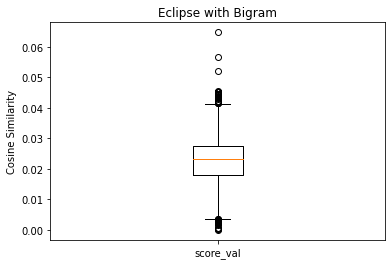

In [ ]:
def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

labels = ['score_val']
bp = plt.boxplot([score_val], labels=labels)
plt.ylabel("Cosine Similarity")
plt.title('Eclipse with Bigram')
print(get_box_plot_data(labels, bp))
plt.show()

In [ ]:
#Values taken from box plot (lower and upper quartile)
less = 0.017871
more = 0.027378

In [ ]:
duplicate_test.insert(loc=7,
          column='Average_Cos_Similarity_Trigram',
          value=avg_df.values)
score_similar_trigram = duplicate_test[duplicate_test['Average_Cos_Similarity_Trigram'] >= more]
score_similar_trigram

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Average_Cos_Similarity_Trigram,Average_Cos_Similarity_Bigram,Average_Cos_Similarity_Score,Resolution,Updated,Description,Duplicate_Bug_Ids
17,17,1368321,defect,"Firefox version 53.0.3 appears high memory, hi...",Firefox,Untriaged,RESOLVED,0.028319,0.034078,0.059955,DUPLICATE,2017-07-05 11:45:21,user agent mozilla gecko firefox ...,1346556.0
89,95,1418073,defect,Drag & Drop for images to desktop strips file ...,Firefox,File Handling,RESOLVED,0.029530,0.037285,0.077509,DUPLICATE,2017-12-07 00:38:37,user agent mozilla gecko firefox ...,1389836.0
323,342,1369688,defect,One-off search takes the initial value rather ...,Firefox,Address Bar,RESOLVED,0.028173,0.039369,0.086483,DUPLICATE,2017-06-03 05:50:32,created attachment keyselectedsearch mozi...,1331736.0
631,671,1332106,enhancement,[Deleted][Windows 10] Possible Cortana Search ...,Firefox,Search,RESOLVED,0.041752,0.052553,0.083782,DUPLICATE,2017-01-18 15:17:32,user agent mozilla gecko firefox ...,1332118.0
1432,1513,1328104,defect,Add Search Engine Button Does Not Work,Firefox,Search,RESOLVED,0.030858,0.041078,0.082702,DUPLICATE,2017-03-31 07:05:33,user agent mozilla gecko firefox ...,1323525.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38168,39537,1741372,defect,Intermittent browser/base/content/test/general...,Firefox,General,RESOLVED,0.027940,0.035383,0.053503,DUPLICATE,2022-01-07 17:20:50,filed by ccozmuta at mozilla com pars...,1733524.0
38183,39553,1717767,defect,PDF with Lab-like ICCBased colors looks wrong,Firefox,PDF Viewer,RESOLVED,0.028426,0.033699,0.056761,DUPLICATE,2021-12-26 12:42:46,created attachment lab like icc pdf user ag...,860023.0
38189,39559,1721313,defect,Middle clicking to paste/insert into the addre...,Firefox,Address Bar,VERIFIED,0.027491,0.039331,0.085929,DUPLICATE,2021-09-01 16:53:27,user agent mozilla gecko firefox ...,1658059.0
38239,39609,1723008,defect,When opening a file off disk in the PDF Viewer...,Firefox,PDF Viewer,RESOLVED,0.031999,0.040639,0.084095,DUPLICATE,2021-08-12 00:12:55,created attachment a blank pdf just for tes...,1723924.0


In [ ]:
score_dissimilar_trigram_final = duplicate_test[duplicate_test['Average_Cos_Similarity_Trigram'] <= less]
score_dissimilar_trigram_final

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Average_Cos_Similarity_Trigram,Average_Cos_Similarity_Bigram,Average_Cos_Similarity_Score,Resolution,Updated,Description,Duplicate_Bug_Ids
51,52,1357039,enhancement,Should add the Customize Firefox tour in the o...,Firefox,General,RESOLVED,0.010312,0.015288,0.040166,DUPLICATE,2017-06-14 22:34:09,should add the customize firefox tour in the o...,1357029.0
72,76,1359062,defect,Increase contrast of the Downloads Indicator o...,Firefox,Downloads Panel,RESOLVED,0.014964,0.020157,0.043839,DUPLICATE,2017-06-04 23:44:56,nightly on windows at the moment a...,1347543.0
96,102,1357056,defect,Should not display the notification bar if use...,Firefox,General,RESOLVED,0.009494,0.015773,0.036657,DUPLICATE,2017-06-18 20:01:01,should not display the notification for the co...,1357641.0
185,195,1357041,defect,Should highlight the customize button in the h...,Firefox,General,RESOLVED,0.012423,0.018419,0.045987,DUPLICATE,2017-06-14 22:34:42,should highlight the customize button in the h...,1357029.0
231,245,1378164,defect,"Noisy debug in a debug build (of Thunderbird, ...",Firefox,Theme,RESOLVED,0.015985,0.019335,0.042511,DUPLICATE,2017-07-04 08:33:46,this bug was initially created as a clone ...,1377923.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38174,39544,1723347,defect,Intermittent browser/components/preferences/te...,Firefox,Preferences,RESOLVED,0.016979,0.022232,0.030835,DUPLICATE,2021-08-02 08:19:36,filed by ncsoregi at mozilla com pars...,1717917.0
38180,39550,1710900,defect,Site permissions panel is incorrectly aligned ...,Firefox,Site Permissions,RESOLVED,0.011449,0.016695,0.040592,DUPLICATE,2021-05-18 04:23:41,created attachment site permissions misalign...,1709870.0
38185,39555,1741967,enhancement,"[Permanent private browsing] Hide ""New Private...",Firefox,Menus,RESOLVED,0.016767,0.025740,0.063666,DUPLICATE,2021-12-07 05:27:00,steps to reproduce firefox on windows ...,1738027.0
38195,39565,1696330,defect,Certviewer does not wrap PEM (chain) files,Firefox,Security,RESOLVED,0.012092,0.014231,0.021568,DUPLICATE,2021-03-08 06:31:24,steps to reproduce open the certificate vi...,1615612.0


In [ ]:
#Download to csv
score_similar_trigram.to_csv("Firefox_textually_similar_trigram_final.csv",index=False)
score_dissimilar_trigram_final.to_csv("Firefox_textually_dissimilar_trigram_final.csv",index=False)

In [ ]:
## Comparison with unigram and bigram for similar
score_similar_trigram['Bug ID'].equals(new_sim['Bug ID'])

False

In [ ]:
bug_list_trigram = list(score_similar_bigram["Bug ID"])
bug_list_bi_uni = list(new_sim["Bug ID"])

In [ ]:
len(bug_list_bi_uni)


1589

In [ ]:
count_id = 0
dup_id_in_bug_id_tri = []
for i,v in enumerate(bug_list_trigram):
    if (v in bug_list_bi_uni):
        count_id +=1
        dup_id_in_bug_id_tri.append(v)

In [ ]:
len(dup_id_in_bug_id_tri)

1589

In [ ]:
dup_id_in_bug_id_tri

In [ ]:
new_sim_final = score_similar_trigram[score_similar_trigram['Bug ID'].isin(dup_id_in_bug_id_tri)]

In [ ]:
new_sim_final

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Average_Cos_Similarity_Trigram,Average_Cos_Similarity_Bigram,Average_Cos_Similarity_Score,Resolution,Updated,Description,Duplicate_Bug_Ids
89,95,1418073,defect,Drag & Drop for images to desktop strips file ...,Firefox,File Handling,RESOLVED,0.029530,0.037285,0.077509,DUPLICATE,2017-12-07 00:38:37,user agent mozilla gecko firefox ...,1389836.0
323,342,1369688,defect,One-off search takes the initial value rather ...,Firefox,Address Bar,RESOLVED,0.028173,0.039369,0.086483,DUPLICATE,2017-06-03 05:50:32,created attachment keyselectedsearch mozi...,1331736.0
631,671,1332106,enhancement,[Deleted][Windows 10] Possible Cortana Search ...,Firefox,Search,RESOLVED,0.041752,0.052553,0.083782,DUPLICATE,2017-01-18 15:17:32,user agent mozilla gecko firefox ...,1332118.0
1432,1513,1328104,defect,Add Search Engine Button Does Not Work,Firefox,Search,RESOLVED,0.030858,0.041078,0.082702,DUPLICATE,2017-03-31 07:05:33,user agent mozilla gecko firefox ...,1323525.0
1543,1626,1333599,defect,URL Spoofing by using onbeforeunload and openi...,Firefox,Address Bar,RESOLVED,0.038145,0.051607,0.094942,DUPLICATE,2020-07-09 13:23:51,i have noticed that the onbeforeunload dialog ...,1481994.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38111,39480,1723284,defect,Search engines don't synchronize,Firefox,Search,RESOLVED,0.029908,0.039307,0.076264,DUPLICATE,2021-07-31 10:58:10,user agent mozilla gecko firefox ...,444284.0
38127,39496,1711709,defect,"The ""Close"" button from the Infobars is bigger...",Firefox,Messaging System,RESOLVED,0.029874,0.040954,0.085033,DUPLICATE,2021-05-18 08:05:04,created attachment screenshot with the issue...,1710910.0
38151,39520,1712738,defect,Search is barely visible (no visible borders) ...,Firefox,Toolbars and Customization,RESOLVED,0.027754,0.037015,0.075709,DUPLICATE,2021-07-06 06:18:38,created attachment search in overflow menu p...,1708173.0
38189,39559,1721313,defect,Middle clicking to paste/insert into the addre...,Firefox,Address Bar,VERIFIED,0.027491,0.039331,0.085929,DUPLICATE,2021-09-01 16:53:27,user agent mozilla gecko firefox ...,1658059.0


In [ ]:
## Comparison with unigram and bigram for dissimilar
score_dissimilar_trigram_final['Bug ID'].equals(new_dissim['Bug ID'])

False

In [ ]:
bug_list_trigram_dis = list(score_dissimilar_trigram_final["Bug ID"])
bug_list_uni_bi_dis = list(new_dissim["Bug ID"])

In [ ]:
count_id = 0
dup_id_in_bug_id_dis_tri = []
for i,v in enumerate(bug_list_trigram_dis):
    if (v in bug_list_uni_bi_dis):
        count_id +=1
        dup_id_in_bug_id_dis_tri.append(v)

In [ ]:
len(dup_id_in_bug_id_dis_tri)

1455

In [ ]:
new_dissim_final = score_dissimilar_trigram_final [score_dissimilar_trigram_final['Bug ID'].isin(dup_id_in_bug_id_dis_tri)]

In [ ]:
new_dissim_final

,Unnamed: 0,Bug ID,Type,Summary,Product,Component,Status,Average_Cos_Similarity_Trigram,Average_Cos_Similarity_Bigram,Average_Cos_Similarity_Score,Resolution,Updated,Description,Duplicate_Bug_Ids
51,52,1357039,enhancement,Should add the Customize Firefox tour in the o...,Firefox,General,RESOLVED,0.010312,0.015288,0.040166,DUPLICATE,2017-06-14 22:34:09,should add the customize firefox tour in the o...,1357029.0
72,76,1359062,defect,Increase contrast of the Downloads Indicator o...,Firefox,Downloads Panel,RESOLVED,0.014964,0.020157,0.043839,DUPLICATE,2017-06-04 23:44:56,nightly on windows at the moment a...,1347543.0
96,102,1357056,defect,Should not display the notification bar if use...,Firefox,General,RESOLVED,0.009494,0.015773,0.036657,DUPLICATE,2017-06-18 20:01:01,should not display the notification for the co...,1357641.0
231,245,1378164,defect,"Noisy debug in a debug build (of Thunderbird, ...",Firefox,Theme,RESOLVED,0.015985,0.019335,0.042511,DUPLICATE,2017-07-04 08:33:46,this bug was initially created as a clone ...,1377923.0
294,312,1386531,enhancement,Add smile/sad face image for the default brows...,Firefox,Preferences,RESOLVED,0.009071,0.011686,0.023955,DUPLICATE,2017-08-09 09:16:16,add smile sad face image for the default brows...,1361957.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38120,39489,1718193,defect,Crash in [@ AsyncShutdownTimeout | profile-cha...,Firefox,General,RESOLVED,0.004230,0.005456,0.008776,DUPLICATE,2022-02-15 05:30:49,crash report stats mozilla org report index...,1464938.0
38174,39544,1723347,defect,Intermittent browser/components/preferences/te...,Firefox,Preferences,RESOLVED,0.016979,0.022232,0.030835,DUPLICATE,2021-08-02 08:19:36,filed by ncsoregi at mozilla com pars...,1717917.0
38180,39550,1710900,defect,Site permissions panel is incorrectly aligned ...,Firefox,Site Permissions,RESOLVED,0.011449,0.016695,0.040592,DUPLICATE,2021-05-18 04:23:41,created attachment site permissions misalign...,1709870.0
38195,39565,1696330,defect,Certviewer does not wrap PEM (chain) files,Firefox,Security,RESOLVED,0.012092,0.014231,0.021568,DUPLICATE,2021-03-08 06:31:24,steps to reproduce open the certificate vi...,1615612.0


In [ ]:
#Download to csv
new_sim_final.to_csv("Firefox_final_sim.csv",index=False)
new_dissim_final.to_csv("Firefox_final_dis.csv",index=False)

In [ ]:
new_sim_final.info()

## Textually similar pair

In [ ]:
#dropping duplicates from Tex sim
df_sim = new_sim_final.drop_duplicates(subset=['Bug ID', 'Summary','Description','Average_Cos_Similarity_Score', 'Average_Cos_Similarity_Bigram', 'Average_Cos_Similarity_Trigram','Duplicate_Bug_Ids' ], keep='first')
df_sim.shape

(1414, 14)

In [ ]:
df_sim.info()

In [ ]:
# Duplicate pair ( b- & b+)
a = df_sim[['Bug ID', 'Duplicate_Bug_Ids', 'Average_Cos_Similarity_Trigram']]
a.reset_index(drop=True, inplace=True)
na = a.to_numpy()



s=[]
for i in range(0, 1414):
    tem = training_dataset.loc[training_dataset['Bug ID'] == na[i,0]]
    s.append(str(tem["Summary"].values))
se = pd.Series(s)
a['Summary1'] = se.values 

s=[]
for i in range(0, 1414):
    tem = training_dataset.loc[training_dataset['Bug ID'] == na[i,0]]
    s.append(str(tem["Description"].values))
se = pd.Series(s)
a['description1'] = se.values

s=[]
for i in range(0, 1414):
    tem = training_dataset.loc[training_dataset['Bug ID'] == na[i,1]]
    s.append(str(tem["Summary"].values))
se = pd.Series(s)
a['summary2'] = se.values 

s=[]
for i in range(0, 1414):
    tem = training_dataset.loc[training_dataset['Bug ID'] == na[i,1]]
    s.append(str(tem["Description"].values))
se = pd.Series(s)
a['description2'] = se.values

a["is_similar"] = 1


a.head()

In [ ]:
a['summary2'][1]

"['Alt+down in location bar searches for original search term rather than selected search term']"

In [ ]:
df_sim_fin= a.copy()
df_sim_fin

,Bug ID,Duplicate_Bug_Ids,Average_Cos_Similarity_Trigram,Summary1,description1,summary2,description2,is_similar
0,1418073,1389836.0,0.029530,['Drag & Drop for images to desktop strips fil...,['user agent mozilla gecko firefox ...,['Saving images via drag-and-drop loses filena...,['under os x dragging an image from the brows...,1
1,1369688,1331736.0,0.028173,['One-off search takes the initial value rathe...,['created attachment keyselectedsearch mo...,['Alt+down in location bar searches for origin...,['i noticed this while working on bug and i...,1
2,1332106,1332118.0,0.041752,['[Deleted][Windows 10] Possible Cortana Searc...,['user agent mozilla gecko firefox ...,[],[],1
3,1328104,1323525.0,0.030858,['Add Search Engine Button Does Not Work'],['user agent mozilla gecko firefox ...,[],[],1
4,1333599,1481994.0,0.038145,['URL Spoofing by using onbeforeunload and ope...,['i have noticed that the onbeforeunload dialo...,[],[],1
...,...,...,...,...,...,...,...,...
1409,1723284,444284.0,0.029908,"[""Search engines don't synchronize""]",['user agent mozilla gecko firefox ...,[],[],1
1410,1711709,1710910.0,0.029874,"['The ""Close"" button from the Infobars is bigg...",['created attachment screenshot with the iss...,[],[],1
1411,1712738,1708173.0,0.027754,['Search is barely visible (no visible borders...,['created attachment search in overflow menu...,[],[],1
1412,1721313,1658059.0,0.027491,['Middle clicking to paste/insert into the add...,['user agent mozilla gecko firefox ...,[],[],1


In [ ]:
df_sim_fin['summary2'] = df_sim_fin['summary2'].replace(['[]'],'0')
df_sim_fin['description2'] = df_sim_fin['description2'].replace(['[]'],'0')

In [ ]:
df_sim_fin.drop(df_sim_fin.loc[df_sim_fin['summary2']=='0'].index, inplace=True)
df_sim_fin

,Bug ID,Duplicate_Bug_Ids,Average_Cos_Similarity_Trigram,Summary1,description1,summary2,description2,is_similar
0,1418073,1389836.0,0.029530,['Drag & Drop for images to desktop strips fil...,['user agent mozilla gecko firefox ...,['Saving images via drag-and-drop loses filena...,['under os x dragging an image from the brows...,1
1,1369688,1331736.0,0.028173,['One-off search takes the initial value rathe...,['created attachment keyselectedsearch mo...,['Alt+down in location bar searches for origin...,['i noticed this while working on bug and i...,1
5,1351282,1401401.0,0.037071,['Cannot delete or edit invalid bookmark'],['created attachment bug dialog png user ag...,['Bookmarks with an invalid url cannot be remo...,['created attachment screenshot of bookmark ...,1
9,1382074,1370401.0,0.033934,['Location bar leaves no room for URL when it ...,['created attachment firefoxfail png user a...,['URL bar icons overflow the URL bar when the ...,['created attachment toolbar screenshot png ...,1
12,1389573,1561894.0,0.029264,['Align one-off buttons to the Address Bar inp...,['created attachment wasted space png i rea...,['Implement simplified one-off search button d...,['invision spec screens putting the t...,1
...,...,...,...,...,...,...,...,...
1398,1744951,1744888.0,0.034010,['[Regression] The “More From Mozilla” pane is...,['created attachment gif notes ...,['mostly empty page and have telemetry issues ...,['mark found some problems if browser prefere...,1
1399,1739138,1737868.0,0.033929,"['[macOS] The elements from the ""Save to Pocke...",['created attachment rec of the issue gif ...,"['""Save To Pocket"" panel is empty when launche...",['the save to pocket button sits in an overf...,1
1404,1685288,1681482.0,0.033059,"['The ""Top Sites"" title is wrongly displayed i...",['created attachment rec of the issue gif ...,['Update newtab section headers'],['find spec here new new tab node id '],1
1405,1717319,1701394.0,0.029007,['Document titles too long to be completely di...,['user agent mozilla gecko firefox ...,['[Proton] RTL tabs title shift to the left wh...,['created attachment user agent ...,1


In [ ]:
df_sim_fin.drop(df_sim_fin.loc[df_sim_fin['description2']=='0'].index, inplace=True)
df_sim_fin

,Bug ID,Duplicate_Bug_Ids,Average_Cos_Similarity_Trigram,Summary1,description1,summary2,description2,is_similar
0,1418073,1389836.0,0.029530,['Drag & Drop for images to desktop strips fil...,['user agent mozilla gecko firefox ...,['Saving images via drag-and-drop loses filena...,['under os x dragging an image from the brows...,1
1,1369688,1331736.0,0.028173,['One-off search takes the initial value rathe...,['created attachment keyselectedsearch mo...,['Alt+down in location bar searches for origin...,['i noticed this while working on bug and i...,1
5,1351282,1401401.0,0.037071,['Cannot delete or edit invalid bookmark'],['created attachment bug dialog png user ag...,['Bookmarks with an invalid url cannot be remo...,['created attachment screenshot of bookmark ...,1
9,1382074,1370401.0,0.033934,['Location bar leaves no room for URL when it ...,['created attachment firefoxfail png user a...,['URL bar icons overflow the URL bar when the ...,['created attachment toolbar screenshot png ...,1
12,1389573,1561894.0,0.029264,['Align one-off buttons to the Address Bar inp...,['created attachment wasted space png i rea...,['Implement simplified one-off search button d...,['invision spec screens putting the t...,1
...,...,...,...,...,...,...,...,...
1398,1744951,1744888.0,0.034010,['[Regression] The “More From Mozilla” pane is...,['created attachment gif notes ...,['mostly empty page and have telemetry issues ...,['mark found some problems if browser prefere...,1
1399,1739138,1737868.0,0.033929,"['[macOS] The elements from the ""Save to Pocke...",['created attachment rec of the issue gif ...,"['""Save To Pocket"" panel is empty when launche...",['the save to pocket button sits in an overf...,1
1404,1685288,1681482.0,0.033059,"['The ""Top Sites"" title is wrongly displayed i...",['created attachment rec of the issue gif ...,['Update newtab section headers'],['find spec here new new tab node id '],1
1405,1717319,1701394.0,0.029007,['Document titles too long to be completely di...,['user agent mozilla gecko firefox ...,['[Proton] RTL tabs title shift to the left wh...,['created attachment user agent ...,1


In [ ]:
df_sim_fin.to_csv("Firefox_textually_similar_pair.csv")
from google.colab import files
files.download("Firefox_textually_similar_pair.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Textually dissimilar pair

In [ ]:
#dropping duplicates from Tex sim
df_dissim = new_dissim_final.drop_duplicates(subset=['Bug ID', 'Summary','Description','Average_Cos_Similarity_Score', 'Average_Cos_Similarity_Bigram', 'Average_Cos_Similarity_Trigram','Duplicate_Bug_Ids' ], keep='first')
df_dissim.shape

(1455, 14)

In [ ]:
df_dissim.info()

In [ ]:
# Duplicate pair ( b- & b+)
a = df_dissim[['Bug ID', 'Duplicate_Bug_Ids', 'Average_Cos_Similarity_Trigram']]
a.reset_index(drop=True, inplace=True)
na = a.to_numpy()


s=[]
for i in range(0, 1455):
    tem = training_dataset.loc[training_dataset['Bug ID'] == na[i,0]]
    s.append(str(tem["Summary"].values))
se = pd.Series(s)
a['Summary1'] = se.values 

s=[]
for i in range(0, 1455):
    tem = training_dataset.loc[training_dataset['Bug ID'] == na[i,0]]
    s.append(str(tem["Description"].values))
se = pd.Series(s)
a['description1'] = se.values

s=[]
for i in range(0, 1455):
    tem = training_dataset.loc[training_dataset['Bug ID'] == na[i,1]]
    s.append(str(tem["Summary"].values))
se = pd.Series(s)
a['summary2'] = se.values 

s=[]
for i in range(0, 1455):
    tem = training_dataset.loc[training_dataset['Bug ID'] == na[i,1]]
    s.append(str(tem["Description"].values))
se = pd.Series(s)
a['description2'] = se.values
a["is_similar"] = 1

a.head()

In [ ]:
a['summary2'][1]

"['Change Toolbar Icons from PNG to SVG']"

In [ ]:
df_dissim_fin= a.copy()
df_dissim_fin

,Bug ID,Duplicate_Bug_Ids,Average_Cos_Similarity_Trigram,Summary1,description1,summary2,description2,is_similar
0,1357039,1357029.0,0.010312,['Should add the Customize Firefox tour in the...,['should add the customize firefox tour in the...,['Should add the Add-on tour in the onBoarding...,['should add the add on tour in the onboarding...,1
1,1359062,1347543.0,0.014964,['Increase contrast of the Downloads Indicator...,['nightly on windows at the moment ...,['Change Toolbar Icons from PNG to SVG'],[' this bug was initially created as a clon...,1
2,1357056,1357641.0,0.009494,['Should not display the notification bar if u...,['should not display the notification for the ...,['Should show the notification bar to notify u...,['should show the notification bar to notify u...,1
3,1378164,1377923.0,0.015985,"[""Noisy debug in a debug build (of Thunderbird...",[' this bug was initially created as a clon...,[],[],1
4,1386531,1361957.0,0.009071,['Add smile/sad face image for the default bro...,['add smile sad face image for the default bro...,[],[],1
...,...,...,...,...,...,...,...,...
1450,1718193,1464938.0,0.004230,['Crash in [@ AsyncShutdownTimeout | profile-c...,['crash report stats mozilla org report ind...,[],[],1
1451,1723347,1717917.0,0.016979,['Intermittent browser/components/preferences/...,[' filed by ncsoregi at mozilla com pa...,['Intermittent windows7-32-qr browser/componen...,[' filed by dluca at mozilla com parse...,1
1452,1710900,1709870.0,0.011449,['Site permissions panel is incorrectly aligne...,['created attachment site permissions misali...,[],[],1
1453,1696330,1615612.0,0.012092,['Certviewer does not wrap PEM (chain) files'],['steps to reproduce open the certificate ...,['about:certificate chain download gives entir...,['user agent mozilla gecko firefox ...,1


In [ ]:
df_dissim_fin['summary2'] = df_dissim_fin['summary2'].replace(['[]'],'0')
df_dissim_fin['description2'] = df_dissim_fin['description2'].replace(['[]'],'0')

In [ ]:
df_dissim_fin.drop(df_dissim_fin.loc[df_dissim_fin['summary2']=='0'].index, inplace=True)
df_dissim_fin

,Bug ID,Duplicate_Bug_Ids,Average_Cos_Similarity_Trigram,Summary1,description1,summary2,description2,is_similar
0,1357039,1357029.0,0.010312,['Should add the Customize Firefox tour in the...,['should add the customize firefox tour in the...,['Should add the Add-on tour in the onBoarding...,['should add the add on tour in the onboarding...,1
1,1359062,1347543.0,0.014964,['Increase contrast of the Downloads Indicator...,['nightly on windows at the moment ...,['Change Toolbar Icons from PNG to SVG'],[' this bug was initially created as a clon...,1
2,1357056,1357641.0,0.009494,['Should not display the notification bar if u...,['should not display the notification for the ...,['Should show the notification bar to notify u...,['should show the notification bar to notify u...,1
5,1365958,1366426.0,0.008658,['Awesomebar text jiggles when there is no sug...,['created attachment jiggle video attache...,['autocomplete-richlistbox height does not fit...,['created attachment autocomplete richlistbo...,1
6,1371904,1371201.0,0.014235,['onboarding-overlay-icon overlaps with mozill...,['created attachment onboarding overlay icon...,['The mozilla icon at top of about:home should...,['the mozilla icon of about home is shown on t...,1
...,...,...,...,...,...,...,...,...
1439,1705907,1692088.0,0.008440,['The new bookmark-hollow.svg is cut-off from ...,['created attachment new bookmark hollow svg...,['Replace placeholder Proton context menu navi...,['the final icons are not available as i write...,1
1441,1694198,1694197.0,0.012610,['Update logins UITour targets for when the Pr...,['the logins target is apparently used by at...,['Update some UITour targets for when the Prot...,['there are a number of uitour targets that ar...,1
1449,1707000,1706800.0,0.013974,"['CSS property ""max-width"" of the element (cla...",['created attachment снимок экрана png us...,['Text overflow the Personalize button in New ...,['created attachment снимок экрана в ...,1
1451,1723347,1717917.0,0.016979,['Intermittent browser/components/preferences/...,[' filed by ncsoregi at mozilla com pa...,['Intermittent windows7-32-qr browser/componen...,[' filed by dluca at mozilla com parse...,1


In [ ]:
df_dissim_fin.drop(df_dissim_fin.loc[df_dissim_fin['description2']=='0'].index, inplace=True)
df_dissim_fin

,Bug ID,Duplicate_Bug_Ids,Average_Cos_Similarity_Trigram,Summary1,description1,summary2,description2,is_similar
0,1357039,1357029.0,0.010312,['Should add the Customize Firefox tour in the...,['should add the customize firefox tour in the...,['Should add the Add-on tour in the onBoarding...,['should add the add on tour in the onboarding...,1
1,1359062,1347543.0,0.014964,['Increase contrast of the Downloads Indicator...,['nightly on windows at the moment ...,['Change Toolbar Icons from PNG to SVG'],[' this bug was initially created as a clon...,1
2,1357056,1357641.0,0.009494,['Should not display the notification bar if u...,['should not display the notification for the ...,['Should show the notification bar to notify u...,['should show the notification bar to notify u...,1
5,1365958,1366426.0,0.008658,['Awesomebar text jiggles when there is no sug...,['created attachment jiggle video attache...,['autocomplete-richlistbox height does not fit...,['created attachment autocomplete richlistbo...,1
6,1371904,1371201.0,0.014235,['onboarding-overlay-icon overlaps with mozill...,['created attachment onboarding overlay icon...,['The mozilla icon at top of about:home should...,['the mozilla icon of about home is shown on t...,1
...,...,...,...,...,...,...,...,...
1439,1705907,1692088.0,0.008440,['The new bookmark-hollow.svg is cut-off from ...,['created attachment new bookmark hollow svg...,['Replace placeholder Proton context menu navi...,['the final icons are not available as i write...,1
1441,1694198,1694197.0,0.012610,['Update logins UITour targets for when the Pr...,['the logins target is apparently used by at...,['Update some UITour targets for when the Prot...,['there are a number of uitour targets that ar...,1
1449,1707000,1706800.0,0.013974,"['CSS property ""max-width"" of the element (cla...",['created attachment снимок экрана png us...,['Text overflow the Personalize button in New ...,['created attachment снимок экрана в ...,1
1451,1723347,1717917.0,0.016979,['Intermittent browser/components/preferences/...,[' filed by ncsoregi at mozilla com pa...,['Intermittent windows7-32-qr browser/componen...,[' filed by dluca at mozilla com parse...,1


In [ ]:
df_dissim_fin.to_csv("Firefox_textually_dissimilar_pair.csv")
from google.colab import files
files.download("Firefox_textually_dissimilar_pair.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>